In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("online_retail_noisy.csv")

In [3]:
df.shape

(525461, 8)

In [4]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
Price           object
Customer ID    float64
Country         object
dtype: object

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2789
Quantity        52048
InvoiceDate         0
Price           49462
Customer ID    107927
Country             0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(2674)

In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,512304,21791,VINTAGE HEADS AND TAILS CARD GAME,2.0,14-06-2010 16:00,1.25,15905.0,United Kingdom
1,505840,82486,WOOD S/3 CABINET ANT WHITE FINISH,2.0,26-04-2010 11:36,7.95,17049.0,United Kingdom
2,537642,TEST123,HI TEC ALPINE HAND WARMER,1.0,07-12-2010 15:33,3.36,NaN,United Kingdom
3,C491820,21545,CERAMIC BIRDHOUSE BUTTERFLY SMALL,-1.0,14-12-2009 13:49,2.95,15015.0,United Kingdom
4,508178,22236,CAKE STAND 3 TIER MAGIC GARDEN,1.0,13-05-2010 12:07,12.75,13878.0,United Kingdom


In [8]:
summary = df.describe(include="all")
print(summary)


       Invoice StockCode         Description       Quantity       InvoiceDate  \
count   525461    525461              522672  473413.000000            525461   
unique   28816      4627                4671            NaN             25296   
top     537434   TEST123  ###UNKNOWN ITEM@@@            NaN  06-12-2010 16:57   
freq       675     10509               26273            NaN               675   
mean       NaN       NaN                 NaN     121.160982               NaN   
std        NaN       NaN                 NaN    1051.620583               NaN   
min        NaN       NaN                 NaN   -9600.000000               NaN   
25%        NaN       NaN                 NaN       1.000000               NaN   
50%        NaN       NaN                 NaN       3.000000               NaN   
75%        NaN       NaN                 NaN      12.000000               NaN   
max        NaN       NaN                 NaN   12960.000000               NaN   

         Price    Customer 

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [10]:
df.columns

Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country'],
      dtype='object')

In [13]:
df["quantity"].unique()[:10]
df["quantity"].apply(lambda x: x % 1 != 0).sum()


np.int64(52048)

In [14]:
df[df["quantity"] % 1 != 0].head(20)


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
16,526276,22726,ALARM CLOCK BAKELIKE GREEN,NaN,11-10-2010 11:50,3.75,14756.0,United Kingdom
45,510775,84686,BEACH HUT MIRROR,NaN,03-06-2010 14:44,1.65,14156.0,EIRE
61,495605,22114,HOT WATER BOTTLE TEA AND SYMPATHY,NaN,26-01-2010 10:32,NaN,12471.0,Germany
66,499853,21547,CERAMIC BIRDHOUSE CRESTED TIT SMALL,NaN,02-03-2010 16:50,2.95,16520.0,United Kingdom
79,538053,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,NaN,09-12-2010 13:34,2.95,15856.0,United Kingdom
88,506721,21976,PACK OF 60 MUSHROOM CAKE CASES,NaN,04-05-2010 09:23,0.55,12507.0,Spain
98,506281,20865,PATCHWORK PENCIL CASE BUTTERFLY,NaN,28-04-2010 16:17,2.1,14395.0,United Kingdom
109,510181,21086,SET/6 RED SPOTTY PAPER CUPS,NaN,27-05-2010 15:29,0.65,15785.0,United Kingdom
131,522105,22151,PLACE SETTING WHITE HEART,NaN,12-09-2010 14:26,0.42,13634.0,United Kingdom
150,528263,22323,PINK POLKADOT KIDS BAG,NaN,21-10-2010 11:52,1.95,16412.0,United Kingdom


In [15]:
df["quantity"].describe()


count    473413.000000
mean        121.160982
std        1051.620583
min       -9600.000000
25%           1.000000
50%           3.000000
75%          12.000000
max       12960.000000
Name: quantity, dtype: float64

In [16]:
df["quantity"].isnull().sum()


np.int64(52048)

In [17]:
df = df.dropna(subset=["quantity"])


In [18]:
df["quantity"].isnull().sum()

np.int64(0)

In [19]:
df["quantity"] = df["quantity"].astype("Int64")


In [20]:
df["price"].isnull().sum()


np.int64(44513)

In [21]:
df = df.dropna(subset=["price"])

In [22]:
df["price"].isnull().sum()


np.int64(0)

In [23]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")


In [24]:
df["price"].isnull().sum()


np.int64(23479)

In [25]:
df = df.dropna(subset=["price"])


In [26]:
df.dtypes

invoice         object
stockcode       object
description     object
quantity         Int64
invoicedate     object
price          float64
customer_id    float64
country         object
dtype: object

In [27]:
df["invoicedate"] = pd.to_datetime(
    df["invoicedate"],
    format="%d-%m-%Y %H:%M",
    errors="coerce"
)


In [28]:
df.dtypes

invoice                object
stockcode              object
description            object
quantity                Int64
invoicedate    datetime64[ns]
price                 float64
customer_id           float64
country                object
dtype: object

In [29]:
df["date"] = df["invoicedate"].dt.date
df["hour"] = df["invoicedate"].dt.hour
df["day"] = df["invoicedate"].dt.day
df["month"] = df["invoicedate"].dt.month
df["year"] = df["invoicedate"].dt.year
df["dayofweek"] = df["invoicedate"].dt.dayofweek


In [30]:
df[df["price"] <= 0].shape


(2836, 14)

In [31]:
df = df[df["price"] > 0]


In [32]:
df[["quantity", "price"]].describe()


,quantity,price
count,402585.0,402585.000000
mean,123.143488,123.469164
std,1057.38288,1085.991642
min,-9360.0,0.001000
25%,1.0,1.250000
50%,3.0,2.100000
75%,12.0,4.250000
max,12960.0,25111.090000


In [34]:
df["is_return"] = df["quantity"] < 0

In [35]:
df["revenue"] = df["quantity"] * df["price"]


In [36]:
df = df[df["quantity"] > 0]


In [37]:
df = df[df["price"] > 0]


In [38]:
df[["quantity", "price"]].describe()


,quantity,price
count,394743.0,394743.000000
mean,126.025221,122.257672
std,1067.206208,1081.456961
min,1.0,0.001000
25%,1.0,1.250000
50%,3.0,2.100000
75%,12.0,4.250000
max,12960.0,25111.090000


In [39]:
df[df["price"] < 0.5].shape


(23128, 16)

In [40]:
Q1 = df["quantity"].quantile(0.25)
Q3 = df["quantity"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

upper_bound, lower_bound

(np.float64(28.5), np.float64(-15.5))

In [41]:
df[df["quantity"] > upper_bound].shape

(25191, 16)

In [42]:
df["quantity"].quantile(0.99)

np.float64(10000.0)

In [43]:
cap = df["quantity"].quantile(0.99)
df = df[df["quantity"] <= cap]

In [44]:
df["price"].quantile(0.99)


np.float64(9999.0)

In [45]:
cap_price = df["price"].quantile(0.99)
df = df[df["price"] <= cap_price]

In [46]:
df.shape


(394735, 16)

In [47]:
df[df["quantity"] == 10000].shape
df[df["price"] == 9999].shape


(4660, 16)

In [48]:
df = df[df["quantity"] != 10000]
df = df[df["price"] != 9999]


In [50]:
df["quantity"].quantile(0.99)



np.float64(120.0)

In [51]:
df["price"].quantile(0.99)

np.float64(19.94039999999979)

In [58]:
import numpy as np  
q_cap = df["quantity"].quantile(0.99)
p_cap = df["price"].quantile(0.99)

df["quantity"] = np.where(df["quantity"] > q_cap, q_cap, df["quantity"])
df["price"] = np.where(df["price"] > p_cap, p_cap, df["price"])



In [59]:
df[["quantity", "price"]].describe()


,quantity,price
count,385597.000000,385597.000000
mean,9.011107,3.380188
std,16.773906,3.424636
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,120.000000,19.940400


In [60]:
df["invoicedate"].isnull().sum()


np.int64(0)

In [61]:
df.columns


Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country', 'date', 'hour', 'day', 'month',
       'year', 'dayofweek', 'is_return', 'revenue'],
      dtype='object')

In [62]:
df.columns.tolist()


['invoice',
 'stockcode',
 'description',
 'quantity',
 'invoicedate',
 'price',
 'customer_id',
 'country',
 'date',
 'hour',
 'day',
 'month',
 'year',
 'dayofweek',
 'is_return',
 'revenue']

In [63]:
df["country"] = (
    df["country"]
      .astype(str)
      .str.strip()
      .str.lower()
)


In [64]:
df["country"].unique()


array(['united kingdom', 'uk', 'eire', 'france', 'finland', 'greece',
       'germany', 'sweden', 'channel islands', 'netherlands', 'italy',
       'portugal', 'unspecified', 'switzerland', 'united arab emirates',
       'spain', 'australia', 'japan', 'norway', 'lithuania', 'austria',
       'cyprus', 'nigeria', 'belgium', 'iceland', 'bahrain', 'malta',
       'usa', 'denmark', 'israel', 'thailand', 'rsa', 'canada',
       'singapore', 'brazil', 'korea', 'poland', 'hong kong', 'bermuda',
       'west indies', 'lebanon'], dtype=object)

In [65]:
df["country"] = df["country"].replace({
    "uk": "united kingdom",
    "u.k.": "united kingdom",
    "united kingdom ": "united kingdom"
})


In [66]:
df["country"].unique()

array(['united kingdom', 'eire', 'france', 'finland', 'greece', 'germany',
       'sweden', 'channel islands', 'netherlands', 'italy', 'portugal',
       'unspecified', 'switzerland', 'united arab emirates', 'spain',
       'australia', 'japan', 'norway', 'lithuania', 'austria', 'cyprus',
       'nigeria', 'belgium', 'iceland', 'bahrain', 'malta', 'usa',
       'denmark', 'israel', 'thailand', 'rsa', 'canada', 'singapore',
       'brazil', 'korea', 'poland', 'hong kong', 'bermuda', 'west indies',
       'lebanon'], dtype=object)

In [67]:
df["description"] = (
    df["description"]
      .astype(str)
      .str.strip()
      .str.lower()
)



In [68]:
df["description"] = df["description"].str.replace(r"[^\w\s]", "", regex=True)


In [69]:
df["stockcode"] = df["stockcode"].astype(str).str.strip().str.upper()


In [71]:
df["stockcode"].value_counts().head()

stockcode
TEST123    7662
85123A     2513
85099B     1508
22423      1484
21212      1396
Name: count, dtype: int64

In [72]:
df = df[~df["stockcode"].isin(["TEST123", "???"])]


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377935 entries, 0 to 525459
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      377935 non-null  object        
 1   stockcode    377935 non-null  object        
 2   description  377935 non-null  object        
 3   quantity     377935 non-null  float64       
 4   invoicedate  377935 non-null  datetime64[ns]
 5   price        377935 non-null  float64       
 6   customer_id  301001 non-null  float64       
 7   country      377935 non-null  object        
 8   date         377935 non-null  object        
 9   hour         377935 non-null  int32         
 10  day          377935 non-null  int32         
 11  month        377935 non-null  int32         
 12  year         377935 non-null  int32         
 13  dayofweek    377935 non-null  int32         
 14  is_return    377935 non-null  boolean       
 15  revenue      377935 non-null  Float64  

In [74]:
df.isnull().sum()

invoice            0
stockcode          0
description        0
quantity           0
invoicedate        0
price              0
customer_id    76934
country            0
date               0
hour               0
day                0
month              0
year               0
dayofweek          0
is_return          0
revenue            0
dtype: int64

In [75]:
df["country"] = df["country"].replace({
    "usa": "united states",
    "rsa": "south africa",
    "eire": "ireland",
    "korea": "south korea"
})


In [76]:
df[df["country"] == "unspecified"].shape


(201, 16)

In [77]:
df=df[df["country"] != "unspecified"]

In [78]:
df[df["country"] == "unspecified"].shape

(0, 16)

In [79]:
df["country"].unique()

array(['united kingdom', 'ireland', 'france', 'finland', 'greece',
       'germany', 'sweden', 'channel islands', 'netherlands', 'italy',
       'portugal', 'switzerland', 'united arab emirates', 'spain',
       'australia', 'japan', 'norway', 'lithuania', 'austria', 'cyprus',
       'nigeria', 'belgium', 'iceland', 'bahrain', 'malta',
       'united states', 'denmark', 'israel', 'thailand', 'south africa',
       'canada', 'singapore', 'brazil', 'south korea', 'poland',
       'hong kong', 'bermuda', 'west indies', 'lebanon'], dtype=object)

In [80]:
df["country"].value_counts().head()

country
united kingdom    353793
ireland             5987
germany             4799
france              3519
netherlands         1737
Name: count, dtype: int64

In [81]:
df["year_month"] = df["invoicedate"].dt.to_period("M")


In [82]:
monthly_df = (
    df.groupby("year_month")["quantity"]
      .sum()
      .reset_index()
)


In [83]:
monthly_df.columns = ["year_month", "total_quantity"]


In [84]:
monthly_df["year_month"] = monthly_df["year_month"].dt.to_timestamp()
monthly_df = monthly_df.sort_values("year_month")

In [85]:
monthly_df.head()

,year_month,total_quantity
0,2009-12-01,258442.0
1,2010-01-01,198823.0
2,2010-02-01,190881.0
3,2010-03-01,264982.0
4,2010-04-01,237623.0


In [86]:
monthly_df.tail()

,year_month,total_quantity
8,2010-08-01,251093.0
9,2010-09-01,316407.0
10,2010-10-01,394226.0
11,2010-11-01,457133.0
12,2010-12-01,115597.0


In [87]:
monthly_df.describe()

,year_month,total_quantity
count,13,13.000000
mean,2010-06-01 07:23:04.615384576,261800.384615
min,2009-12-01 00:00:00,115597.000000
25%,2010-03-01 00:00:00,225591.000000
50%,2010-06-01 00:00:00,251093.000000
75%,2010-09-01 00:00:00,264982.000000
max,2010-12-01 00:00:00,457133.000000
std,NaN,87407.661224


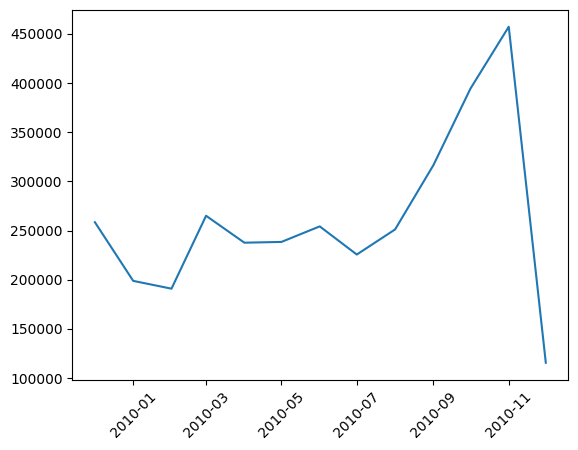

In [90]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_df["year_month"], monthly_df["total_quantity"])
plt.xticks(rotation=45)
plt.show()


In [89]:
%pip install matplotlib

  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)

   ------ --------------------------------- 1/6 [kiwisolver]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -

In [91]:
bf= pd.read_csv("online_retail_noisy.csv")

In [92]:
def data_quality_report(bf):
    report = pd.DataFrame({
        "dtype": bf.dtypes,
        "null_count": bf.isnull().sum(),
        "null_pct": bf.isnull().mean() * 100,
        "unique_values": bf.nunique()
    })
    return report


In [93]:
raw_report = data_quality_report(bf)


In [94]:
raw_shape = bf.shape
raw_duplicates = bf.duplicated().sum()
raw_negative_qty = (bf["quantity"] < 0).sum()
raw_zero_price = (bf["price"] <= 0).sum()


KeyError: 'quantity'

In [95]:
bf.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [96]:
raw_negative_qty = (bf["Quantity"] < 0).sum()
raw_zero_price = (bf["Price"] <= 0).sum()


TypeError: '<=' not supported between instances of 'str' and 'int'

In [97]:
bf["Price"].value_counts().head(20)

Price
1.25    45561
0.85    34540
2.95    32309
1.65    30163
2.1     20853
3.75    18316
1.95    17828
0.42    17714
2.55    15995
4.95    13780
2.51    10253
5.95     9714
1.45     9476
1.66     8704
4.21     8211
0.55     7963
4.25     7460
3.36     7185
0.65     7085
7.95     6442
Name: count, dtype: int64

In [98]:
price_numeric = pd.to_numeric(bf["Price"], errors="coerce")

In [99]:
bf[price_numeric.isnull()]["Price"].unique()[:20]

array([nan, '£2.95', '£39.95', '£1.25', '£2.55', '£3.75', '£5.95',
       '£0.85', '£9.95', '£0.29', '£nan', '£1.65', '£0.42', '£1.95',
       '£3.39', '£5.06', '£2.51', '£6.75', '£3.95', '£8.5'], dtype=object)

In [100]:
raw_zero_price = (price_numeric <= 0).sum()


In [101]:
bf["Price"].unique()[:20]


array(['1.25', '7.95', '3.36', '2.95', '12.75', '0.42', '0.85', '1.95',
       '0.81', nan, '7.62', '0.83', '1.65', '£2.95', '3.75', '3.95',
       '1.45', '2.98', '6.75', '4.95'], dtype=object)

In [108]:
raw_shape = bf.shape
raw_duplicates = bf.duplicated().sum()
raw_negative_qty = (bf["quantity"] < 0).sum()
raw_zero_price = (bf["price"] <= 0).sum()


KeyError: 'quantity'

In [109]:
qty_numeric = pd.to_numeric(bf["Quantity"], errors="coerce")


In [110]:
raw_negative_qty = (qty_numeric < 0).sum()


In [111]:
raw_null_qty = qty_numeric.isnull().sum()


In [112]:
bf[qty_numeric.isnull()]["Quantity"].unique()[:20]


array([nan])

In [113]:
clean_report = data_quality_report(df)


In [114]:
clean_shape = df.shape
clean_duplicates = df.duplicated().sum()
clean_negative_qty = (df["quantity"] < 0).sum()
clean_zero_price = (df["price"] <= 0).sum()


In [115]:
summary = pd.DataFrame({
    "Metric": [
        "Rows",
        "Duplicates",
        "Negative Quantity",
        "Zero/Negative Price"
    ],
    "Before": [
        raw_shape[0],
        raw_duplicates,
        raw_negative_qty,
        raw_zero_price
    ],
    "After": [
        clean_shape[0],
        clean_duplicates,
        clean_negative_qty,
        clean_zero_price
    ]
})


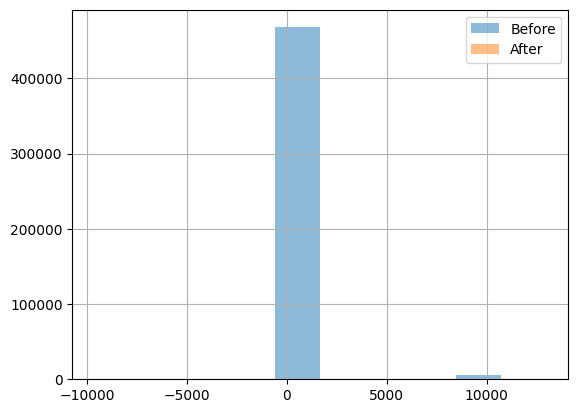

In [117]:
plt.figure()
bf["Quantity"].hist(alpha=0.5, label="Before")
df["quantity"].hist(alpha=0.5, label="After")
plt.legend()
plt.show()


In [118]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522672 non-null  object 
 3   Quantity     473413 non-null  float64
 4   InvoiceDate  525461 non-null  object 
 5   Price        475999 non-null  object 
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), object(6)
memory usage: 32.1+ MB


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377734 entries, 0 to 525459
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      377734 non-null  object        
 1   stockcode    377734 non-null  object        
 2   description  377734 non-null  object        
 3   quantity     377734 non-null  float64       
 4   invoicedate  377734 non-null  datetime64[ns]
 5   price        377734 non-null  float64       
 6   customer_id  300821 non-null  float64       
 7   country      377734 non-null  object        
 8   date         377734 non-null  object        
 9   hour         377734 non-null  int32         
 10  day          377734 non-null  int32         
 11  month        377734 non-null  int32         
 12  year         377734 non-null  int32         
 13  dayofweek    377734 non-null  int32         
 14  is_return    377734 non-null  boolean       
 15  revenue      377734 non-null  Float64  

In [120]:
df.to_csv("online_retail_cleaned.csv", index=False)


In [121]:
monthly_df.to_csv("monthly_demand_cleaned.csv", index=False)


In [123]:
summary.to_csv("data_quality_comparison.csv", index=False)
